<a href="https://colab.research.google.com/github/ovpolevik/eda_and_dev_tools/blob/eda/EDA_online_shoppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation libraries

In [64]:
!pip install ydata_profiling

In [65]:
!pip install association-metrics -q

# EDA

**Online Shoppers Purchasing Intention Dataset**

The `Revenue` attribute can be used as the class label.

`Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The `Bounce Rate`, `Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- The value of `Bounce Rate` feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
- The value of `Exit Rate` feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
- The `Page Value` feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

[Link](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset) to the description of the original dataset.

***Additional Information***
The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user
profile, or period.

## Importing libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport # to whatch full EDA in one page

## Loading and studying the data

In [67]:
SESSIONS_DATASET = 'https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv'
df_sessions = pd.read_csv(SESSIONS_DATASET, sep = ',')

In [68]:
df_sessions.shape

(12330, 18)

In [69]:
df_sessions.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [70]:
df_sessions.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [71]:
df_sessions.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1302,5,1417.500000,0,0.0,36,1051.248276,0.000000,0.002293,0.000000,0.0,Mar,2,2,5,2,Returning_Visitor,True,False
2894,7,290.666667,0,0.0,35,1384.533333,0.001754,0.016886,12.685832,0.0,May,2,2,2,2,Returning_Visitor,True,False
8133,0,0.000000,0,0.0,3,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,1,4,10,Returning_Visitor,True,False
4813,0,0.000000,1,100.0,13,364.350000,0.000000,0.015385,0.000000,0.0,May,3,2,2,3,Returning_Visitor,True,False
6247,2,298.200000,0,0.0,48,1850.116667,0.004082,0.004422,7.562922,0.0,Nov,1,1,2,2,Returning_Visitor,True,True


In [72]:
# Check the DataFrame's info - overall
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##  Checking for missing values, duplicates

In [73]:
# Check for missing values (percentage)
round(df_sessions.isnull().mean()*100, 2)[df_sessions.isnull().mean() > 0]

Informational_Duration     1.61
ProductRelated_Duration    3.98
ExitRates                  0.80
dtype: float64

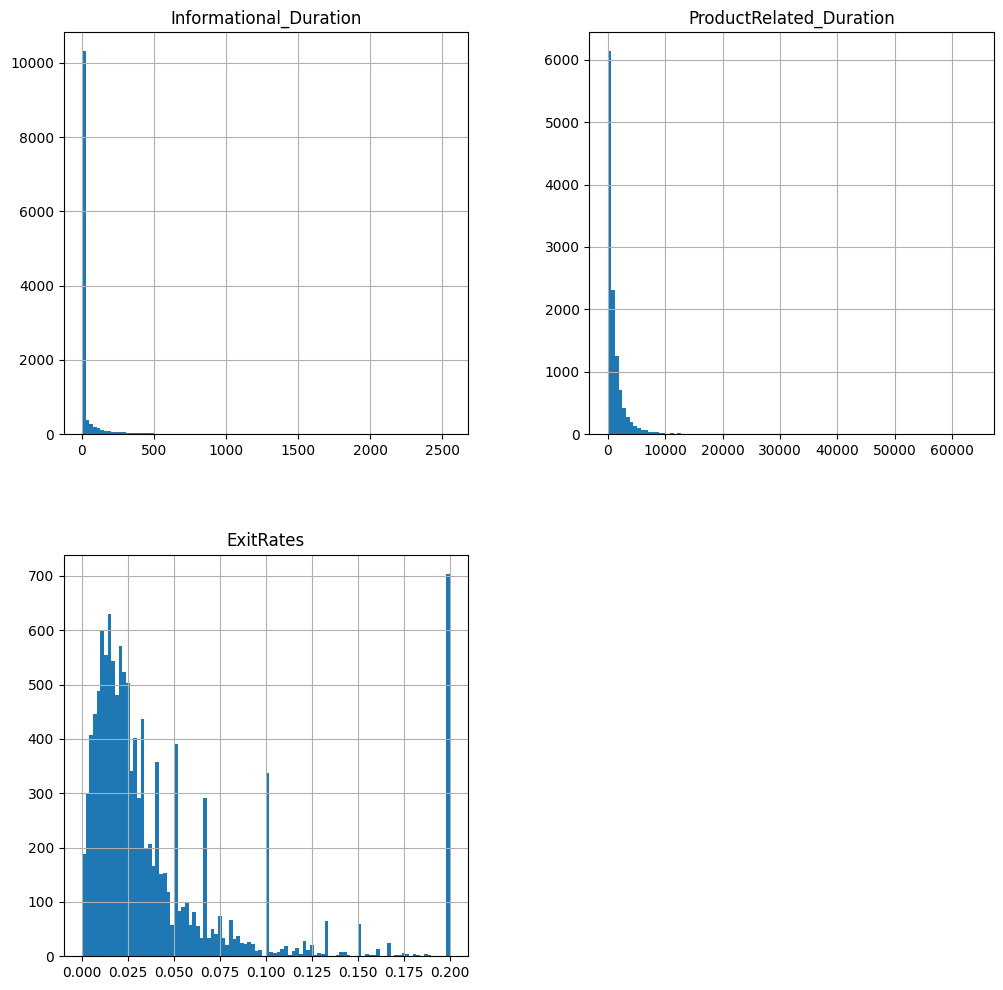

In [74]:
# Let's examine the distribution of fields with missing values to ascertain if it's appropriate to replace them with the median.

df_sessions[['Informational_Duration', 'ProductRelated_Duration', 'ExitRates']].hist(bins=100, figsize=(12,12));

Eliminate missing values.

Given that they constitute less than 5% of the dataset, their removal will not significantly impact the overall analysis and can be deemed appropriate for this situation.

In [75]:
df_sessions.dropna(inplace = True)

In [76]:
# Check for duplicates

print('Duplicates =', df_sessions.duplicated().sum(),
      '\npercent of total rows = ', round(df_sessions.duplicated().sum() / df_sessions.shape[0] * 100, 2))

Duplicates = 107 
percent of total rows =  0.93


In [77]:
# drop duplicates

df_sessions.drop_duplicates(inplace=True)
df_sessions.reset_index(inplace=True, drop=True)

## Checking the correctness of the columns with categorical data

### First of all we will check columns with `object` type

In [78]:
df_sessions.describe(include=[object])

,Month,VisitorType
count,11448,11448
unique,11,3
top,May,Returning_Visitor
freq,3111,9797


In [79]:
df_sessions.Month.unique()

array(['Feb', 'aug', 'Mar', 'May', 'Oct', 'June', 'Aug', 'Nov', 'Sep',
       'Jul', 'Dec'], dtype=object)

We see that 'Month' column has duplicates and it consists of just 10 monthes.
Let's correct it (by replacing 'aug' with 'Aug')

In [80]:
df_sessions.Month = df_sessions.Month.str.replace('aug', 'Aug')
df_sessions.Month.unique()

array(['Feb', 'Aug', 'Mar', 'May', 'Oct', 'June', 'Nov', 'Sep', 'Jul',
       'Dec'], dtype=object)

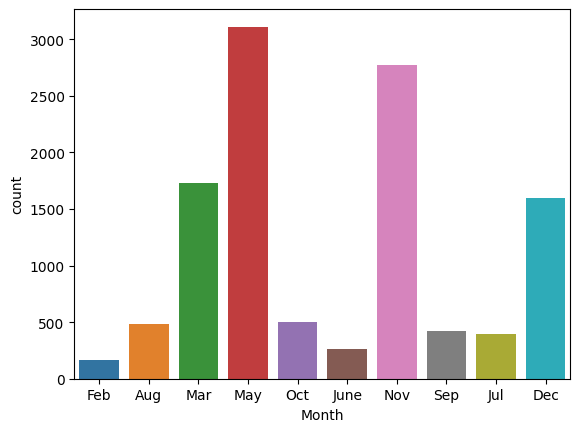

In [81]:
# Analyzing 'Month'

sns.countplot(x='Month', data=df_sessions)
plt.show()

In [82]:
df_sessions.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

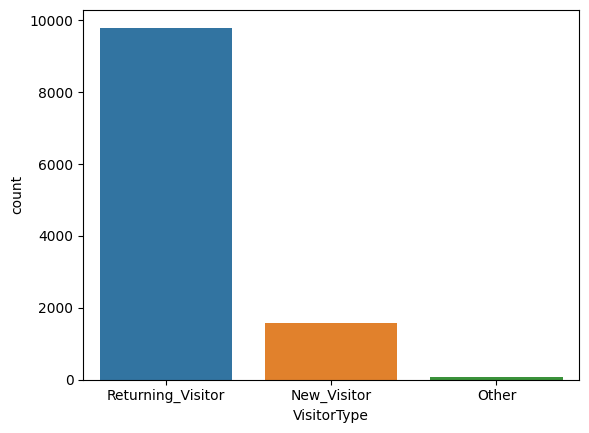

In [83]:
# Analyzing 'VisitorType'

sns.countplot(x='VisitorType', data=df_sessions)
plt.show()

 `'VisitorType'` is highly imbalanced

### Checking numerical categorial data

In [84]:
# Consider this as categorical data (we will treat it as an identifier for something

df_sessions[['OperatingSystems', 'Browser',	'Region',	'TrafficType']].astype('object').describe().transpose()

,count,unique,top,freq
OperatingSystems,11448,8,2,6116
Browser,11448,12,2,7365
Region,11448,9,1,4428
TrafficType,11448,20,2,3661


In [85]:
# We also have column SpecialDates - categorial

df_sessions.SpecialDay.unique()

array([0. , 0.4, 1. , 0.8, 0.2, 0.6])

## Analyzing the 'Revenue' target variable

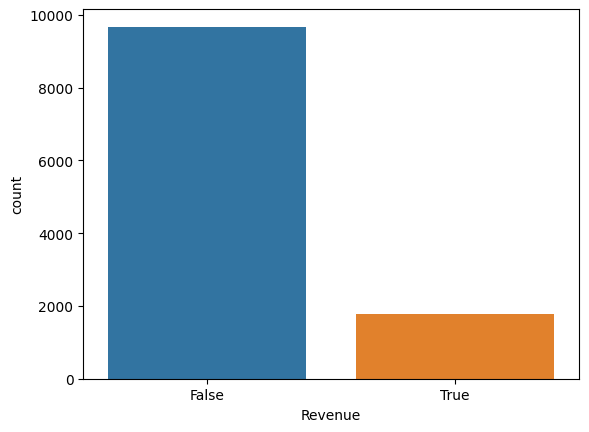

In [86]:
sns.countplot(x='Revenue', data=df_sessions)
plt.show()

In [87]:
print('We have only {}% positive class samples ending with shopping'.format(round(df_sessions.Revenue.mean() * 100, 2)))

We have only 15.46% positive class samples ending with shopping


The target `'Revenue'` is imbalanced - the model may tend to "memorize" the dominant class and consistently predict it. While this can lead to high overall accuracy, it often results in poor performance for the minority class. Therefore, balancing the classes may improve our model's performance.

## Analyze numerical features

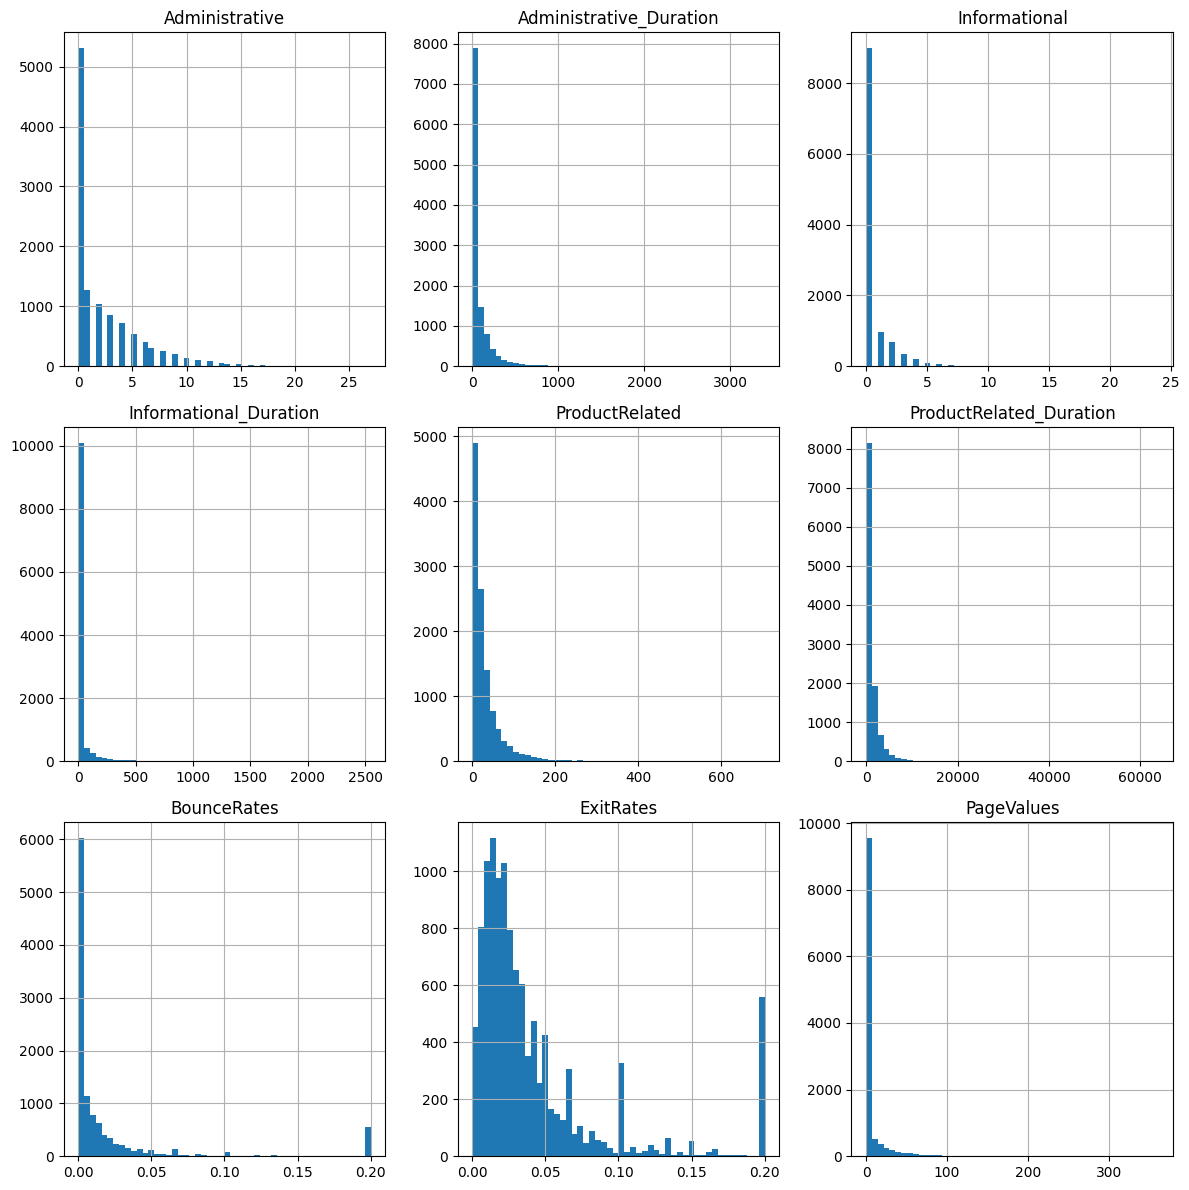

In [88]:
df_sessions[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues']].hist(bins = 50, figsize=(12,12))
plt.tight_layout()  # adjusts subplot params so that subplots fit in the figure area
plt.show()

1. Initially, we observe non-normal features that may require normalization. Looks like featuries have an exponential distribution or log-normal distribution (`'ExitRates'` more likely has log-normal distribution)
2. We also note that 'BounceRates' and 'ExitRates' contain a significant number of samples with high values. It would be beneficial to investigate the cause of this pattern further.
3. Each feature contains a substantial number of zeroes. We could potentially transform these into binary features ({feature}_is_zero) further in single-factor analysis and attempt to normalize the non-zero portion of the features to better understand correlations within the non-zero subset.
4. From the dataset, it's evident that there's a wealth of data and strong correlations between some features.

Now let's examine our features (`'Administrative_Duration'`,`'Informational_Duration'`, `'ProductRelated_Duration'`, `'BounceRates'`, `'ExitRates'`, `'PageValues'`) after applying the Box-Cox transformation for normalization (with dropped zeroes).

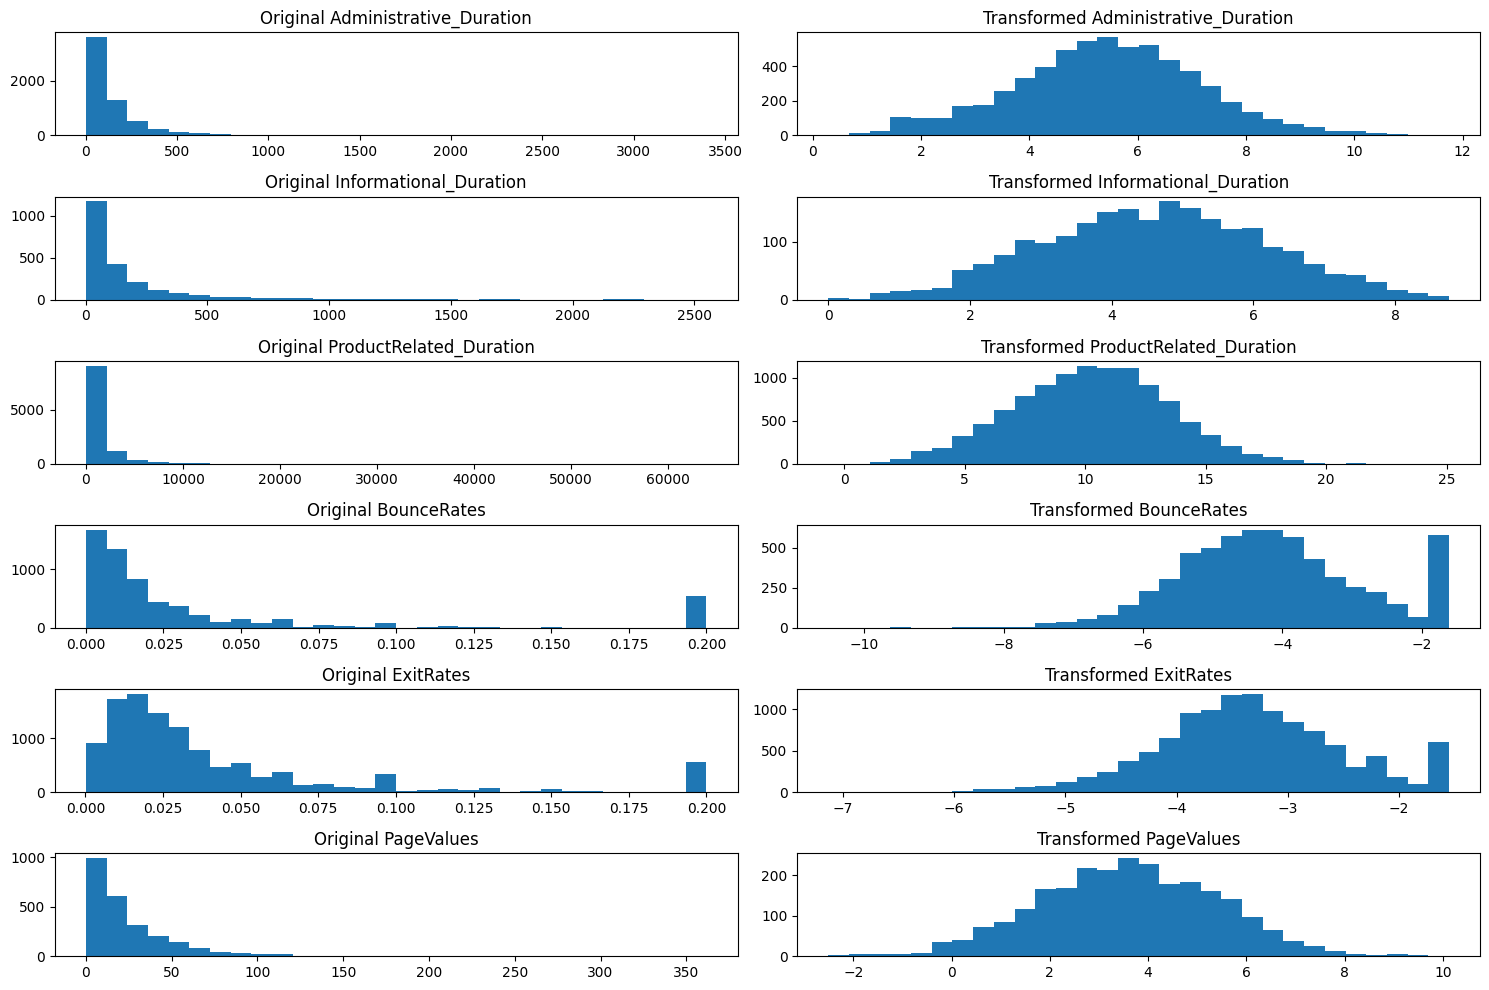

In [89]:
features = ['Administrative_Duration', 'Informational_Duration',
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

fig = plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    ax = fig.add_subplot(len(features), 2, 2*i+1)
    ax.hist(df_sessions[feature][df_sessions[feature] > 0], bins=30)
    ax.set_title(f"Original {feature}")

    # Apply the Box-Cox transformation (without zeroes)
    transformed_feature, _ = stats.boxcox(df_sessions[feature][df_sessions[feature] > 0])

    ax = fig.add_subplot(len(features), 2, 2*i+2)
    ax.hist(transformed_feature, bins=30)
    ax.set_title(f"Transformed {feature}")

plt.tight_layout()
plt.show()

As I said previusly, we see that 'BounceRates' and 'ExitRates' contain a significant number of samples with high values. We have to investigate the cause of this pattern further.

## Correlations and relationships

NB: Our target is a binary variable, so we need to consider this when examining correlations. Additionally, we could use this binary target to compute group means when dealing with categorical features (we will see it in single-factor analysis later)

### Pearson's correlation for detecting linear relationships between featuries

<Axes: >

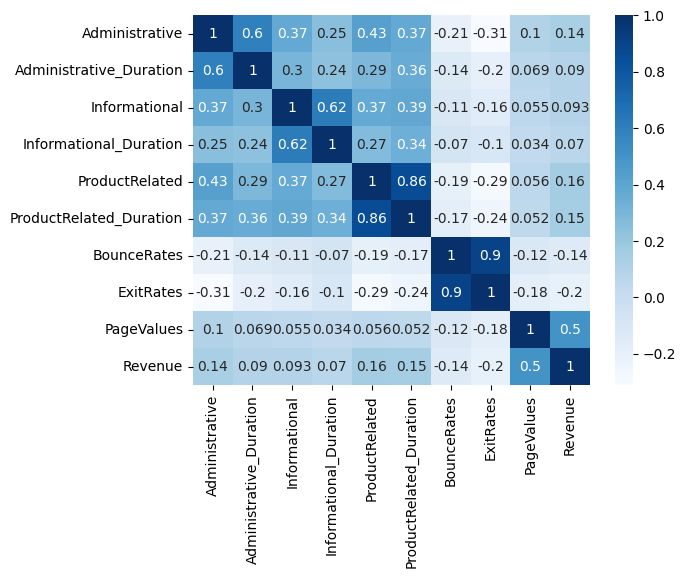

In [90]:
corr_p = df_sessions[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues', 'Revenue']].corr()

sns.heatmap(corr_p, cmap="Blues", annot=True)

### Rank correlation - Spearman correlation (it is better to use with our binary target)

<Axes: >

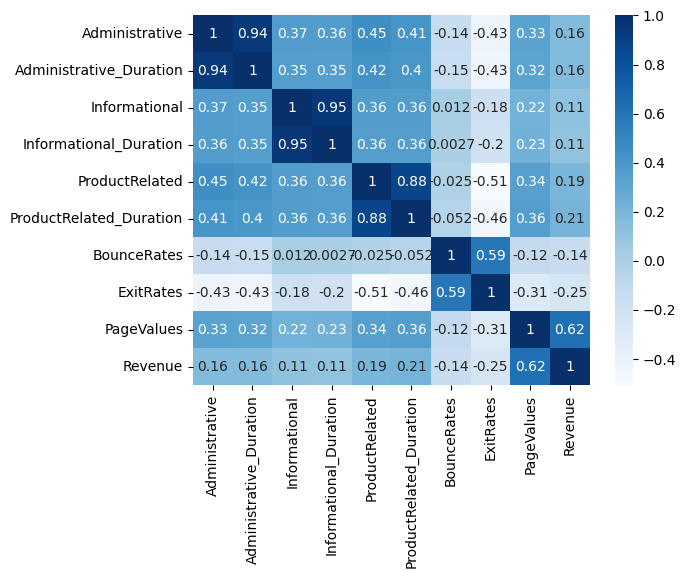

In [91]:
corr_s = df_sessions[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
             'ProductRelated', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues', 'Revenue']].corr(method = 'spearman')

sns.heatmap(corr_s, cmap="Blues", annot=True)

Highly correlated:
1. Administrative with Administrative_Duration
2. Informational with Informational_Duration
3. ProductRelated with ProductRelated_Duration
4. BounceRates with ExitRates

`Revenue` is correlated with `PageValues` (we also can understand it from data description) and `ExitRates`

### Point-Biserial Correlation (between binary target and numeric features)

In [92]:
features = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated',
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

for feature in features:
    corr, p_value = stats.pointbiserialr(df_sessions['Revenue'], df_sessions[feature])
    print(f"Correlation of {feature} with Revenue: {corr}, p-value: {p_value}")

Correlation of Administrative with Revenue: 0.13529816815194962, p-value: 6.603250756358402e-48
Correlation of Administrative_Duration with Revenue: 0.08993782377904666, p-value: 5.344384072581299e-22
Correlation of Informational with Revenue: 0.09262546443209006, p-value: 3.05903949322068e-23
Correlation of Informational_Duration with Revenue: 0.07026307180449004, p-value: 5.219750902845762e-14
Correlation of ProductRelated with Revenue: 0.15595823855871915, p-value: 2.997649915437968e-63
Correlation of ProductRelated_Duration with Revenue: 0.15037946371615035, p-value: 6.953504822233492e-59
Correlation of BounceRates with Revenue: -0.1443200132084574, p-value: 2.493521969937953e-54
Correlation of ExitRates with Revenue: -0.2029141129318927, p-value: 1.1506519366890184e-106
Correlation of PageValues with Revenue: 0.4994088053921354, p-value: 0.0



`Revenue` is correlated with `PageValues` (we also can understand it from data description) and `ExitRates`
(same as Pearson)

### Relationships between categorial featuries - Cramér's V

In [93]:
import association_metrics as am

In [94]:
categorial_names = ['OperatingSystems', 'Browser',	'Region',	'TrafficType', 'Month', 'VisitorType', 'SpecialDay', 'Weekend', 'Revenue']

In [95]:
df_cat = df_sessions[categorial_names].apply(lambda x: x.astype("category"))

cramersv = am.CramersV(df_cat)

cramer = cramersv.fit()

cramer

,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,SpecialDay,Weekend,Revenue
OperatingSystems,1.000000,0.593094,0.113966,0.186016,0.061100,0.448583,0.037025,0.121424,0.077843
Browser,0.593094,1.000000,0.123999,0.194503,0.068769,0.495081,0.032734,0.089165,0.044154
Region,0.113966,0.123999,1.000000,0.084526,0.044433,0.169754,0.027585,0.029632,0.028797
TrafficType,0.186016,0.194503,0.084526,1.000000,0.201112,0.367657,0.118148,0.151345,0.171629
Month,0.061100,0.068769,0.044433,0.201112,1.000000,0.136484,0.238534,0.069279,0.177503
VisitorType,0.448583,0.495081,0.169754,0.367657,0.136484,1.000000,0.068961,0.047859,0.104893
SpecialDay,0.037025,0.032734,0.027585,0.118148,0.238534,0.068961,1.000000,0.260547,0.089571
Weekend,0.121424,0.089165,0.029632,0.151345,0.069279,0.047859,0.260547,1.000000,0.028252
Revenue,0.077843,0.044154,0.028797,0.171629,0.177503,0.104893,0.089571,0.028252,1.000000


<Axes: >

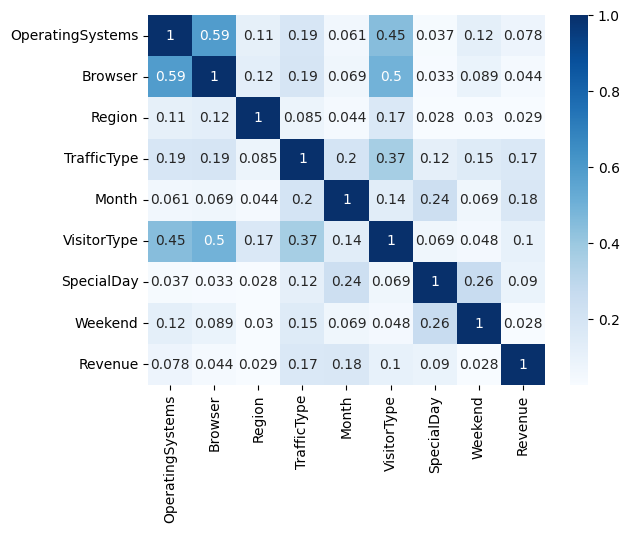

In [96]:
sns.heatmap(cramer, cmap="Blues", annot=True)

Correlated:
1. Browser with OperatingSystem
2. VisitorType with OperatingSystem, Browser and TrafficType

`Revenue` might be correlated with `TrafficType` and `Month`

###  Kruskal-Wallis test is a non-parametric equivalent of ANOVA - numeric (not normal) / categorial relationship

#### With our target

When dealing with a binary target variable, we can examine whether there's a significant difference in the mean values of continuous variables across the two classes (0 and 1) represented in our binary target. In this context, we may consider our binary target as the independent variable and each continuous feature as a dependent variable.

In [97]:
features = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues']

for feature in features:
    categories = df_sessions['Revenue'].unique()
    data_for_test = [df_sessions.loc[df_sessions['Revenue']==category, feature] for category in categories]
    H, p_val = stats.kruskal(*data_for_test)
    if p_val >= 0.05:
      print(f"Correlation with {feature} - NO")
    else:
      print(f"Correlation with {feature} - YES")


Correlation with Administrative - YES
Correlation with Administrative_Duration - YES
Correlation with Informational - YES
Correlation with Informational_Duration - YES
Correlation with ProductRelated - YES
Correlation with ProductRelated_Duration - YES
Correlation with BounceRates - YES
Correlation with ExitRates - YES
Correlation with PageValues - YES


#### With other featuries

In [98]:
cat_featuries = ['OperatingSystems', 'Browser',	'Region',	'TrafficType', 'Month',
                 'VisitorType', 'SpecialDay', 'Weekend']
cont_features = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues']

Data = []

for cat_feature in cat_featuries:
    for cont_feature in cont_features:
        categories = df_sessions[cat_feature].unique()
        data_for_test = [df_sessions.loc[df_sessions[cat_feature] == category, cont_feature] for category in categories]
        H, p_value = stats.kruskal(*data_for_test)
        if p_value >= 0.05:
          Data.append({'Category' : cat_feature, 'Numerical' : cont_feature, 'Is correlated' : 'No'})
        else:
          Data.append({'Category' : cat_feature, 'Numerical' : cont_feature, 'Is correlated' : 'Yes'})

KruskalRes = pd.DataFrame.from_dict(Data)

In [99]:
KruskalRes[KruskalRes['Is correlated'] == 'No']

,Category,Numerical,Is correlated
0,OperatingSystems,Administrative,No
2,OperatingSystems,Informational,No
3,OperatingSystems,Informational_Duration,No
18,Region,Administrative,No
20,Region,Informational,No
21,Region,Informational_Duration,No
23,Region,ProductRelated_Duration,No
25,Region,ExitRates,No
71,Weekend,PageValues,No


## Single-factor analysis

### TrafficType

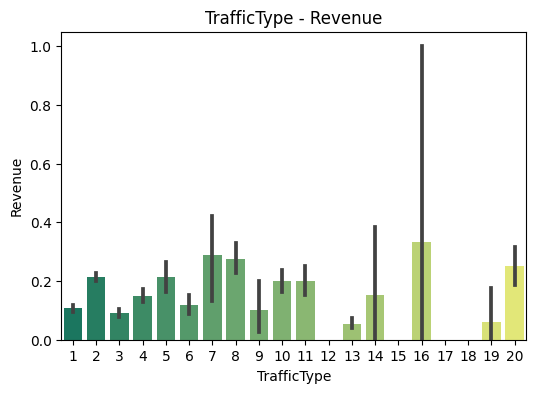

In [100]:
plt.figure(figsize=(6,4))

sns.barplot(x='TrafficType', y='Revenue', data = df_sessions, palette='summer')
plt.title('TrafficType - Revenue')
plt.show()

Let's examine the success rate of the 'TrafficType' in 'Revenue' using the Wilson confidence interval.

In [101]:
df_traffic_type = df_sessions[['TrafficType', 'Revenue']].groupby('TrafficType', as_index = False). \
agg(
    RevenueMean = ('Revenue','mean'),
    ObservationsTotal = ('Revenue','count'),
    ObservationsSuccess = ('Revenue','sum')). \
sort_values('ObservationsTotal', ascending = False)

In [102]:
from statsmodels.stats.proportion import proportion_confint

In [103]:
df_traffic_type['lower_95'] = df_traffic_type. \
apply(lambda x: proportion_confint(x.ObservationsSuccess, x.ObservationsTotal,
                                   alpha=0.05, method='wilson')[0], axis = 1)

df_traffic_type['upper_95'] = df_traffic_type. \
apply(lambda x: proportion_confint(x.ObservationsSuccess, x.ObservationsTotal,
                                   alpha=0.05, method='wilson')[1], axis = 1)

df_traffic_type

,TrafficType,RevenueMean,ObservationsTotal,ObservationsSuccess,lower_95,upper_95
1,2,0.214695,3661,786,0.201697,0.228292
0,1,0.106535,2234,238,0.094410,0.120011
2,3,0.091005,1890,172,0.078855,0.104815
3,4,0.149653,1009,151,0.128972,0.172991
12,13,0.054653,677,37,0.039908,0.074423
5,6,0.118483,422,50,0.091038,0.152812
9,10,0.198565,418,83,0.163143,0.239476
7,8,0.276398,322,89,0.230404,0.327663
4,5,0.212245,245,52,0.165689,0.267685
10,11,0.199134,231,46,0.152743,0.255368


In [104]:
df_traffic_copy = df_traffic_type.copy(deep = True)

df_traffic_copy['Error_lower'] = df_traffic_copy. \
apply(lambda row:row['RevenueMean'] - row['lower_95'] if row['RevenueMean'] > 0 else 0, axis=1)

df_traffic_copy['Error_upper'] = df_traffic_copy. \
apply(lambda row: row['upper_95'] - row['RevenueMean'] if row['RevenueMean'] > 0 else 0, axis=1)

df_traffic_copy = df_traffic_copy.sort_values('TrafficType')

# Error array
errors = np.array([df_traffic_copy['Error_lower'], df_traffic_copy['Error_upper']])

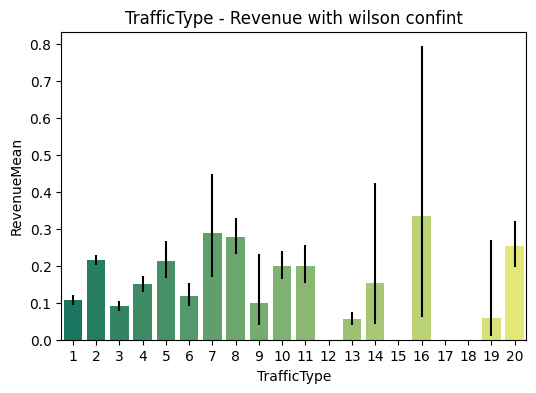

In [105]:
plt.figure(figsize=(6,4))

sns.barplot(x='TrafficType', y='RevenueMean', data = df_traffic_type,
            yerr=errors, palette='summer')
plt.title('TrafficType - Revenue with wilson confint')
plt.show()

This bar plot demonstrates the differences between various traffic types, even when certain types lack a sufficient number of observations

In [181]:
# Let's check Chi-Square test for independence

contingency = pd.crosstab(df_sessions['TrafficType'], df_sessions['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 4.4473697426963316e-60 - we have correlation


### Month

In [106]:
df_sessions[['Month', 'Revenue']].groupby('Month', as_index = False). \
agg(
    RevenueMean = ('Revenue','mean'),
    ObservationsTotal = ('Revenue','count')). \
sort_values('ObservationsTotal', ascending = False)

,Month,RevenueMean,ObservationsTotal
6,May,0.106397,3111
7,Nov,0.253155,2773
5,Mar,0.100694,1728
1,Dec,0.125471,1594
8,Oct,0.213147,502
0,Aug,0.182573,482
9,Sep,0.192488,426
3,Jul,0.137845,399
4,June,0.106061,264
2,Feb,0.017751,169


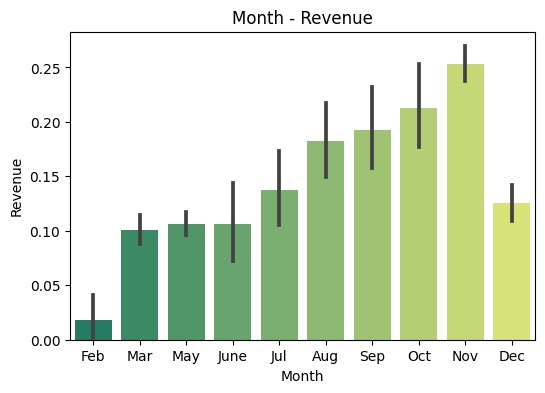

In [107]:
plt.figure(figsize=(6,4))

sns.barplot(x='Month', y='Revenue', data = df_sessions,
            order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep',
                     'Oct', 'Nov', 'Dec'],
            palette='summer')
plt.title('Month - Revenue')
plt.show()

It's likely that we are observing a seasonal effect here.

### SpecialDay

In [108]:
df_sessions[['SpecialDay', 'Revenue']].groupby('SpecialDay', as_index = False). \
agg(
    RevenueMean = ('Revenue','mean'),
    ObservationsTotal = ('Revenue','count')). \
sort_values('ObservationsTotal', ascending = False)

,SpecialDay,RevenueMean,ObservationsTotal
0,0.0,0.165417,10271
3,0.6,0.075529,331
4,0.8,0.036667,300
2,0.4,0.051724,232
1,0.2,0.081871,171
5,1.0,0.062937,143


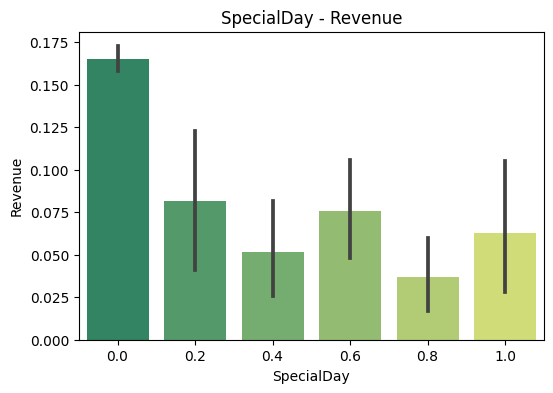

In [109]:
plt.figure(figsize=(6,4))

sns.barplot(x='SpecialDay', y='Revenue', data = df_sessions, palette='summer')
plt.title('SpecialDay - Revenue')
plt.show()

In [182]:
# Let's check Chi-Square test for independence

contingency = pd.crosstab(df_sessions['SpecialDay'], df_sessions['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 2.7481866947653257e-18 - we have correlation


In [183]:
# Let's check Chi-Square test for independence for non-zero data

contingency = pd.crosstab(df_sessions[df_sessions.SpecialDay > 0]['SpecialDay'], df_sessions[df_sessions.SpecialDay > 0]['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 0.19672912320537983 - we don't have correlation


It's difficult to determine if there are substantial differences among various types of specials. If we were to create a binary feature such as 'isSpecial', it would be highly imbalanced. However, I believe it's crucial to retain this feature. In the future, we could use a more specific 'special day' for each holiday or unique event (similar to the 'prophet' of meta).

### Weekend

In [110]:
df_weekend = df_sessions[['Weekend', 'Revenue']].groupby('Weekend', as_index = False). \
agg(
    RevenueMean = ('Revenue','mean'),
    ObservationsTotal = ('Revenue','count'),
    ObservationsSuccess = ('Revenue','sum'))

df_weekend['lower_95'] = df_weekend. \
apply(lambda x: proportion_confint(x.ObservationsSuccess, x.ObservationsTotal,
                                   alpha=0.05, method='wilson')[0], axis = 1)

df_weekend['upper_95'] = df_weekend. \
apply(lambda x: proportion_confint(x.ObservationsSuccess, x.ObservationsTotal,
                                   alpha=0.05, method='wilson')[1], axis = 1)

df_weekend

,Weekend,RevenueMean,ObservationsTotal,ObservationsSuccess,lower_95,upper_95
0,False,0.148956,8761,1305,0.141654,0.156565
1,True,0.173055,2687,465,0.159221,0.187823


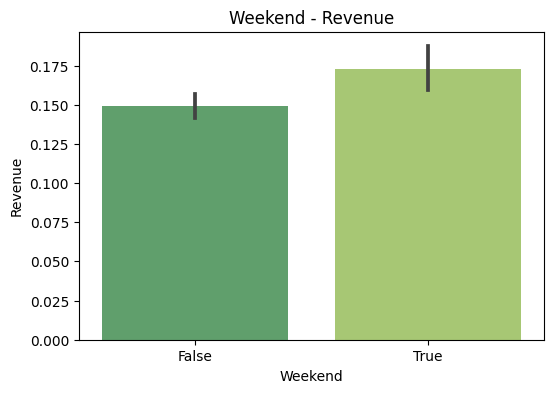

In [111]:
plt.figure(figsize=(6,4))

sns.barplot(x='Weekend', y='Revenue', data = df_sessions, palette='summer')
plt.title('Weekend - Revenue')
plt.show()

Based on the Wilson confidence intervals, we can hypothesize that there is a significant difference in 'Revenue'. However, let's further validate this assumption by calculating the confidence interval for the difference between the two proportions.

In [112]:
alpha = 0.05
z = stats.norm.ppf(1 - alpha / 2.)

p1 = df_weekend.loc[df_weekend.Weekend, 'ObservationsSuccess'].item() / df_weekend.loc[df_weekend.Weekend, 'ObservationsTotal'].item()
p2 = df_weekend.loc[~df_weekend.Weekend, 'ObservationsSuccess'].item() / df_weekend.loc[~df_weekend.Weekend, 'ObservationsTotal'].item()

left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ df_weekend.loc[df_weekend.Weekend, 'ObservationsTotal'].item() +
                                        p2 * (1 - p2)/ df_weekend.loc[~df_weekend.Weekend, 'ObservationsTotal'].item())
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ df_weekend.loc[df_weekend.Weekend, 'ObservationsTotal'].item() +
                                         p2 * (1 - p2)/ df_weekend.loc[~df_weekend.Weekend, 'ObservationsTotal'].item())

print(left_boundary, right_boundary)

0.007969851912009034 0.04022985509038897


The 95% confidence interval for the difference between the two proportions does not include 0. Therefore, we can infer that there is a significant difference between the groups (but not too big)

In [184]:
# Let's check Chi-Square test for independence

contingency = pd.crosstab(df_sessions['Weekend'], df_sessions['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 0.0027687589123669577 - we have correlation


### VisitorType

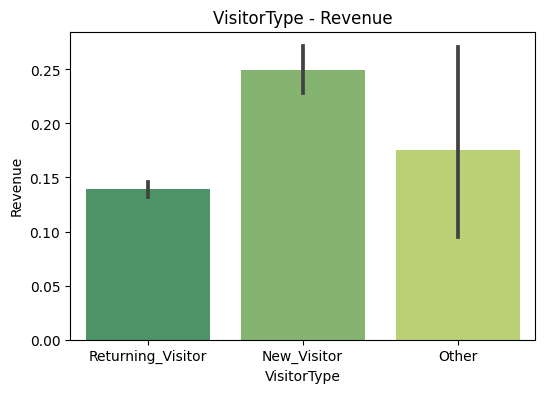

In [113]:
plt.figure(figsize=(6,4))

sns.barplot(x='VisitorType', y='Revenue', data = df_sessions, palette='summer')
plt.title('VisitorType - Revenue')
plt.show()

Despite the significant imbalance in the 'VisitorType' field, it's suspected that the 'Other' type may be mistakenly assigned, especially if we operate under the assumption that users are exclusively categorized as either new or returning.

In [180]:
# Let's check Chi-Square test for independence

contingency = pd.crosstab(df_sessions['VisitorType'], df_sessions['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 4.455626075329962e-28 - we have correlation


### Region

In [114]:
df_sessions[['Region', 'Revenue']].groupby('Region', as_index = False). \
agg(
    RevenueMean = ('Revenue','mean'),
    ObservationsTotal = ('Revenue','count'))

,Region,RevenueMean,ObservationsTotal
0,1,0.163279,4428
1,2,0.163842,1062
2,3,0.145749,2223
3,4,0.149227,1099
4,5,0.152824,301
5,6,0.135819,751
6,7,0.155367,708
7,8,0.126238,404
8,9,0.161017,472


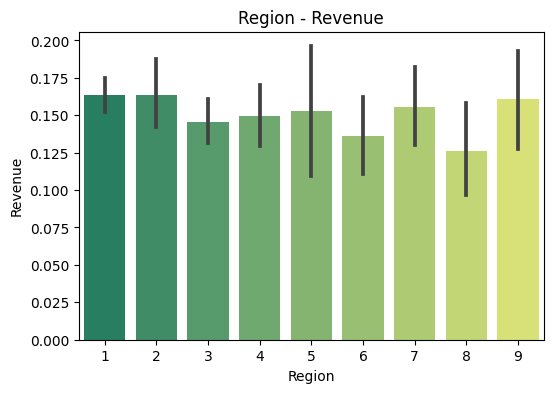

In [115]:
plt.figure(figsize=(6,4))

sns.barplot(x='Region', y='Revenue', data = df_sessions, palette='summer')
plt.title('Region - Revenue')
plt.show()

All confidence intervals intersect with each other, indicating that we cannot definitively state there are differences among groups.

In [185]:
# Let's check Chi-Square test for independence

contingency = pd.crosstab(df_sessions['Region'], df_sessions['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 0.30241342287344336 - we don't have correlation


### OperatingSystems

In [116]:
df_sessions[['OperatingSystems', 'Revenue']].groupby('OperatingSystems', as_index = False). \
agg(
    RevenueMean = ('Revenue','mean'),
    ObservationsTotal = ('Revenue','count'))

,OperatingSystems,RevenueMean,ObservationsTotal
0,1,0.148945,2417
1,2,0.174624,6116
2,3,0.103682,2363
3,4,0.174779,452
4,5,0.166667,6
5,6,0.105263,19
6,7,0.142857,7
7,8,0.205882,68


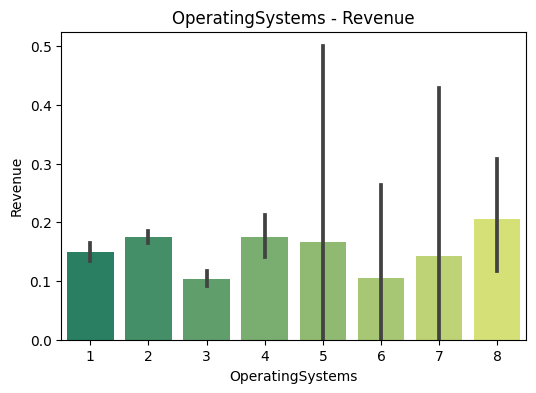

In [117]:
plt.figure(figsize=(6,4))

sns.barplot(x='OperatingSystems', y='Revenue', data = df_sessions, palette='summer')
plt.title('OperatingSystems - Revenue')
plt.show()

In [187]:
# Let's check Chi-Square test for independence

contingency = pd.crosstab(df_sessions['OperatingSystems'], df_sessions['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 1.9817264452679173e-12 - we have correlation


In [189]:
# Let's check Chi-Square test for independence without OS 3

contingency = pd.crosstab(df_sessions[df_sessions.OperatingSystems != 3]['OperatingSystems'], df_sessions[df_sessions.OperatingSystems != 3]['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 0.14173056214642699 - we don't have correlation


### Browser

In [118]:
df_sessions[['Browser', 'Revenue']].groupby('Browser', as_index = False). \
agg(
    RevenueMean = ('Revenue','mean'),
    ObservationsTotal = ('Revenue','count'))

,Browser,RevenueMean,ObservationsTotal
0,1,0.148890,2297
1,2,0.153157,7365
2,3,0.052083,96
3,4,0.176812,690
4,5,0.187215,438
5,6,0.121951,164
6,7,0.127660,47
7,8,0.160305,131
8,10,0.176471,153
9,11,0.166667,6


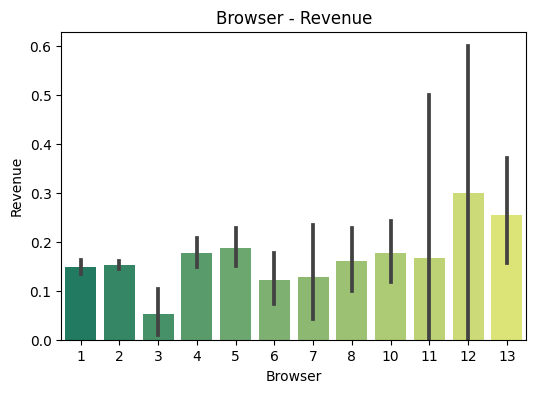

In [119]:
plt.figure(figsize=(6,4))

sns.barplot(x='Browser', y='Revenue', data = df_sessions, palette='summer')
plt.title('Browser - Revenue')
plt.show()

In [188]:
# Let's check Chi-Square test for independence

contingency = pd.crosstab(df_sessions['Browser'], df_sessions['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 0.02201669133531028 - we have correlation


In [190]:
# Let's check Chi-Square test for independence without Browser 3

contingency = pd.crosstab(df_sessions[df_sessions.Browser != 3]['Browser'], df_sessions[df_sessions.Browser != 3]['Revenue'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 0.15275804038863336 - we don't have correlation


In [120]:
df_sessions[(df_sessions['Browser'] == 3) | (df_sessions['OperatingSystems'] == 3)]. \
groupby(['Browser', 'OperatingSystems'], as_index = False).size()

,Browser,OperatingSystems,size
0,1,3,1
1,2,3,2235
2,3,2,1
3,3,3,95
4,5,3,5
5,6,3,11
6,7,3,9
7,12,3,6
8,13,3,1


While we're unable to definitively discern differences among the groups, we do notice that a particular browser and operating system notably deviate from the rest. It could be beneficial to delve deeper into the data; this anomaly could potentially be attributed to a technical glitch associated with a specific browser and operating system. In this case, we don't have corelation of our target with Browser and OS

### Administrative_Duration

As for the numeric features, given the strong correlation observed in pairs of page types and durations, it would be more beneficial to utilize these as continuous variables.

In [121]:
def plot_original_and_normalized_non_zero_data(feature):
  fig = plt.figure(figsize=(9, 6))

  ax = fig.add_subplot(2, 1, 1)
  ax.hist(df_sessions[feature][df_sessions[feature] > 0], bins=30)
  ax.set_title(f"Original {feature}")

  # Apply the Box-Cox transformation (without zeroes)
  transformed_feature, _ = stats.boxcox(df_sessions[feature][df_sessions[feature] > 0])

  ax = fig.add_subplot(2, 1, 2)
  ax.hist(transformed_feature, bins=30)
  ax.set_title(f"Transformed {feature}")

  plt.tight_layout()
  plt.show()

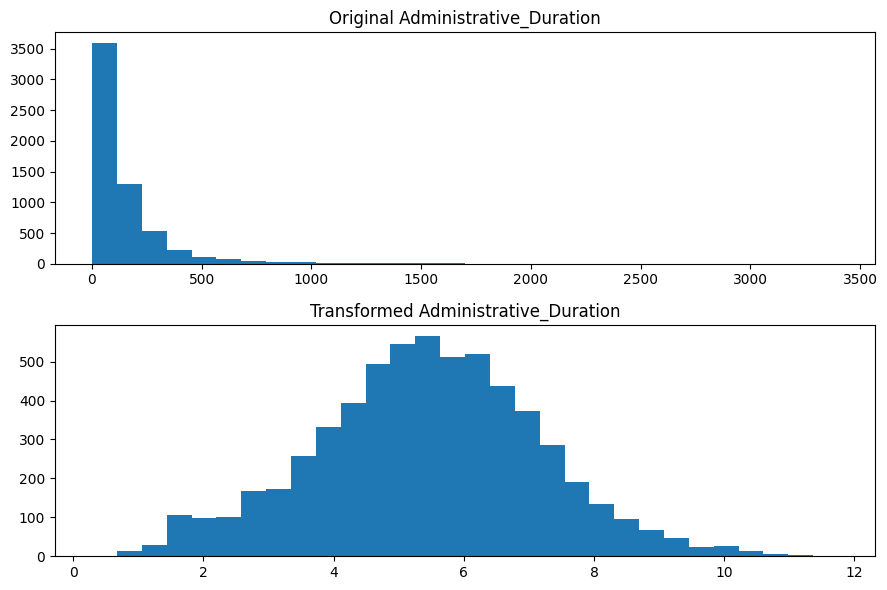

In [122]:
plot_original_and_normalized_non_zero_data('Administrative_Duration')

Checking correlation in normalized data

In [123]:
df_sessions_wo_zero = df_sessions[['Administrative_Duration', 'Revenue']][df_sessions['Administrative_Duration'] > 0]. \
reset_index(drop = True).copy(deep = True)
df_sessions_wo_zero['Administrative_Duration_bc'], _ = stats.boxcox(df_sessions_wo_zero['Administrative_Duration'])
df_sessions_wo_zero.head()

,Administrative_Duration,Revenue,Administrative_Duration_bc
0,53.0,False,4.728057
1,64.6,False,5.008423
2,6.0,False,1.936415
3,18.0,False,3.279195
4,9.0,False,2.417361


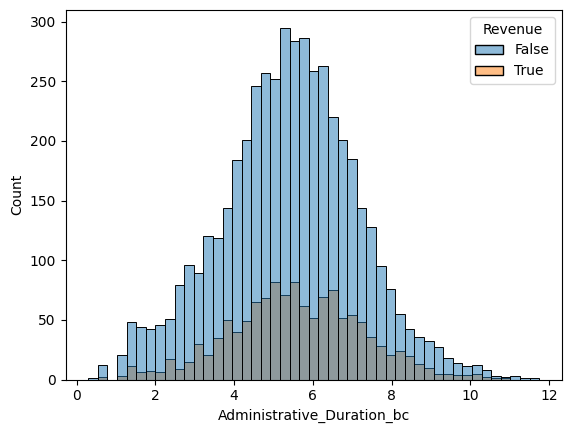

In [124]:
sns.histplot(x ='Administrative_Duration_bc', data = df_sessions_wo_zero, hue = 'Revenue')
plt.show();

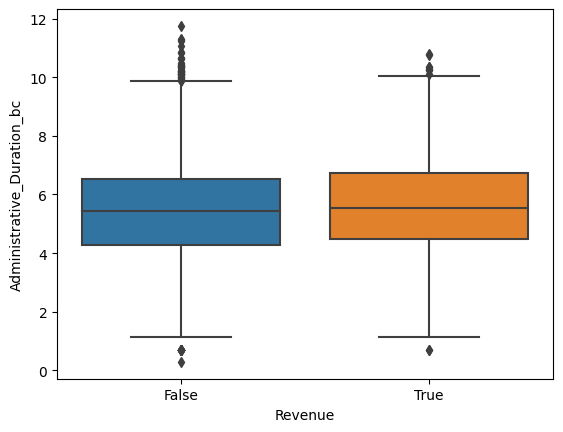

In [125]:
sns.boxplot(x='Revenue', y ='Administrative_Duration_bc', data = df_sessions_wo_zero)
plt.show();

In [126]:
correlation = df_sessions_wo_zero['Administrative_Duration_bc'].corr(df_sessions_wo_zero['Revenue'])
print(correlation)

0.04447366459927464


After normalizing and excluding zero values, we don't observe any correlation with target. Let's attempt binary categorization of 'Administrative_Duration' to see if it provides us with further insight.

In [127]:
df_sessions_binary_ad = df_sessions[['Administrative_Duration', 'Revenue']].copy(deep = True)
df_sessions_binary_ad['AdmDuration_bin'] = df_sessions_binary_ad['Administrative_Duration'] > 0
df_sessions_binary_ad.head()

,Administrative_Duration,Revenue,AdmDuration_bin
0,0.0,False,False
1,0.0,False,False
2,0.0,False,False
3,0.0,False,False
4,0.0,False,False


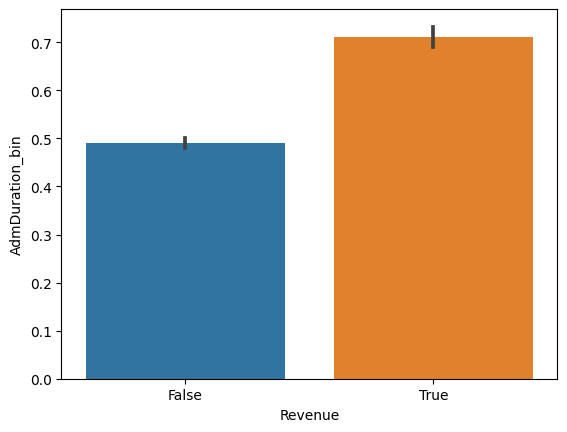

In [128]:
sns.barplot(x='Revenue', y='AdmDuration_bin', data=df_sessions_binary_ad)
plt.show()

Chi-Square Test for Independence

In [191]:
contingency = pd.crosstab(df_sessions_binary_ad['Revenue'], df_sessions_binary_ad['AdmDuration_bin'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 2.3059696313443387e-65 - we have correlation


We notice a significant difference between the binary feature and the target, which is consistent with our expectations. However, we fail to identify any correlation with the 'duration' variable when it is non-zero.

### Informational_Duration

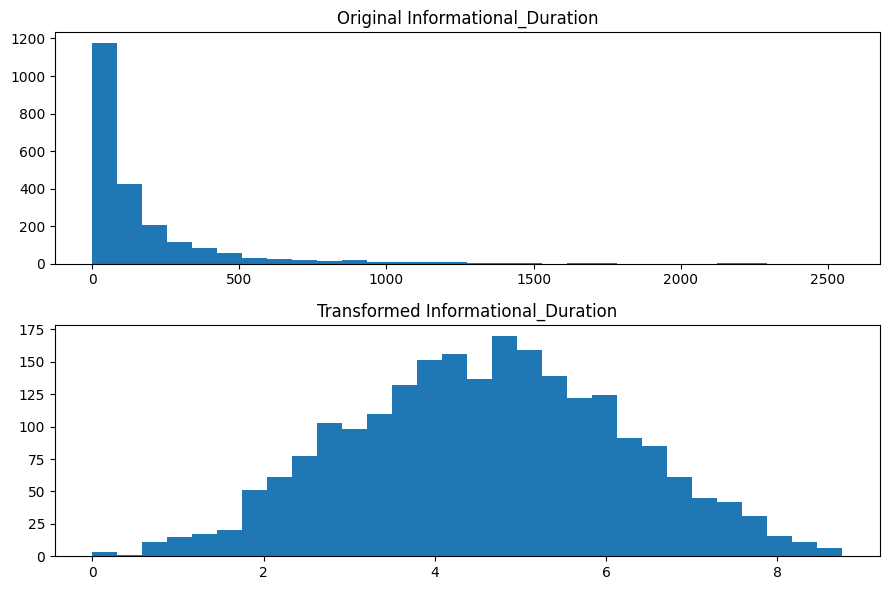

In [130]:
plot_original_and_normalized_non_zero_data('Informational_Duration')

In [131]:
# Checking correlation in normalized data

df_sessions_wo_zero = df_sessions[['Informational_Duration', 'Revenue']][df_sessions['Informational_Duration'] > 0]. \
reset_index(drop = True).copy(deep = True)
df_sessions_wo_zero['Informational_Duration_bc'], _ = stats.boxcox(df_sessions_wo_zero['Informational_Duration'])

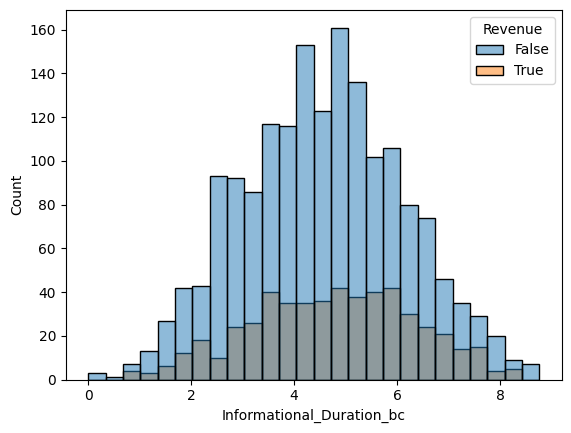

In [132]:
sns.histplot(x ='Informational_Duration_bc', data = df_sessions_wo_zero, hue = 'Revenue')
plt.show();

In [133]:
correlation = df_sessions_wo_zero['Informational_Duration_bc'].corr(df_sessions_wo_zero['Revenue'])
print(correlation)

0.056381274032871


After normalizing and excluding zero values, we don't observe any correlation with target. Let's attempt binary categorization of 'Informational_Duration' to see if it provides us with further insight.

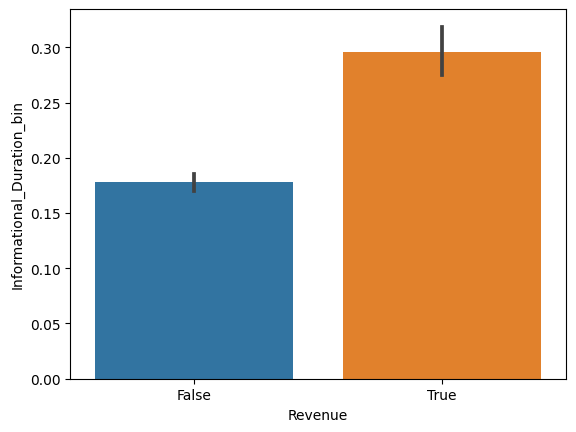

In [134]:
df_sessions_binary = df_sessions[['Informational_Duration', 'Revenue']].copy(deep = True)
df_sessions_binary['Informational_Duration_bin'] = df_sessions_binary['Informational_Duration'] > 0

sns.barplot(x='Revenue', y='Informational_Duration_bin', data=df_sessions_binary)
plt.show()

In [193]:
# Chi-Square Test for Independence

contingency = pd.crosstab(df_sessions_binary['Revenue'], df_sessions_binary['Informational_Duration_bin'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
if p < 0.05:
  print(f"p-value: {p} - we have correlation")
else:
  print(f"p-value: {p} - we don't have correlation")

p-value: 1.5697841872767489e-30 - we have correlation


Same as Administrative_Duration we notice a significant difference between the binary feature and the target. However, we fail to identify any correlation with the 'duration' variable when it is non-zero.

### ProductRelated_Duration

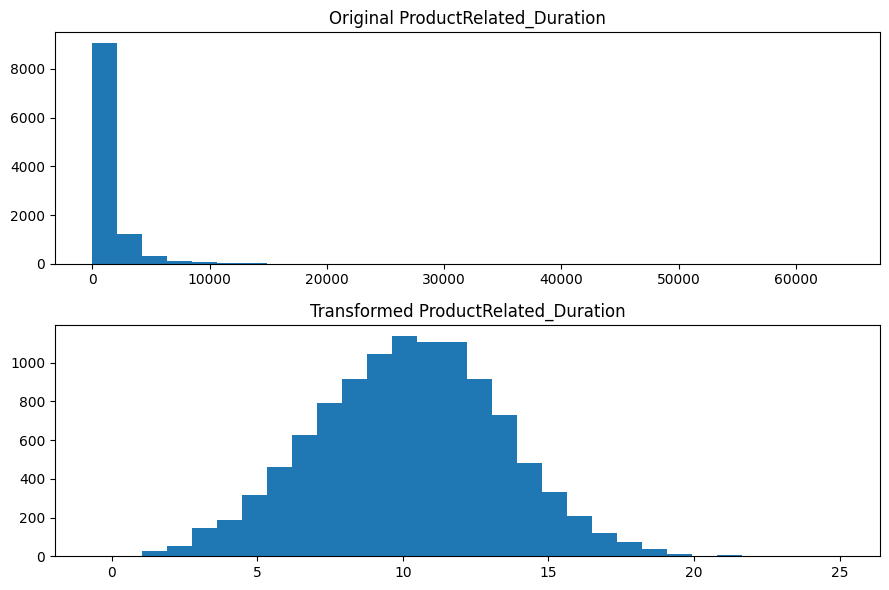

In [136]:
plot_original_and_normalized_non_zero_data('ProductRelated_Duration')

In [137]:
# Checking correlation in normalized data

df_sessions_wo_zero = df_sessions[['ProductRelated_Duration', 'Revenue']][df_sessions['ProductRelated_Duration'] > 0]. \
reset_index(drop = True).copy(deep = True)
df_sessions_wo_zero['ProductRelated_Duration_bc'], _ = stats.boxcox(df_sessions_wo_zero['ProductRelated_Duration'])

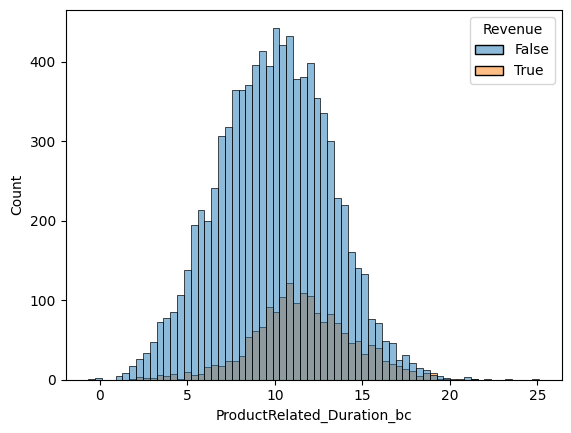

In [138]:
sns.histplot(x ='ProductRelated_Duration_bc', data = df_sessions_wo_zero, hue = 'Revenue')
plt.show();

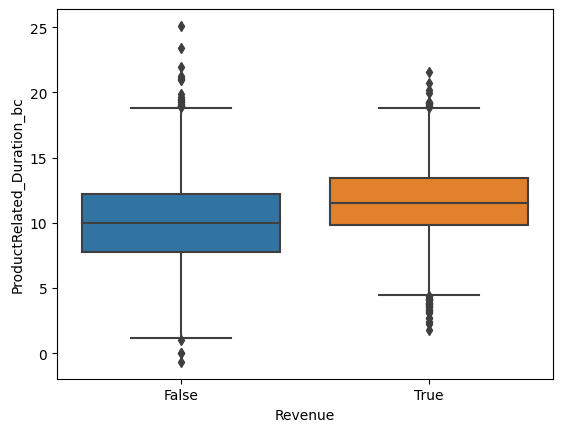

In [139]:
sns.boxplot(x='Revenue', y ='ProductRelated_Duration_bc', data = df_sessions_wo_zero)
plt.show();

In [140]:
correlation = df_sessions_wo_zero['ProductRelated_Duration_bc'].corr(df_sessions_wo_zero['Revenue'])
print(correlation)

0.19272021489709726


We discern a weak association, which is consistent with our previous observation of correlation with this feature. It would be advisable to preserve it in its current form.

### BounceRates and ExitRates

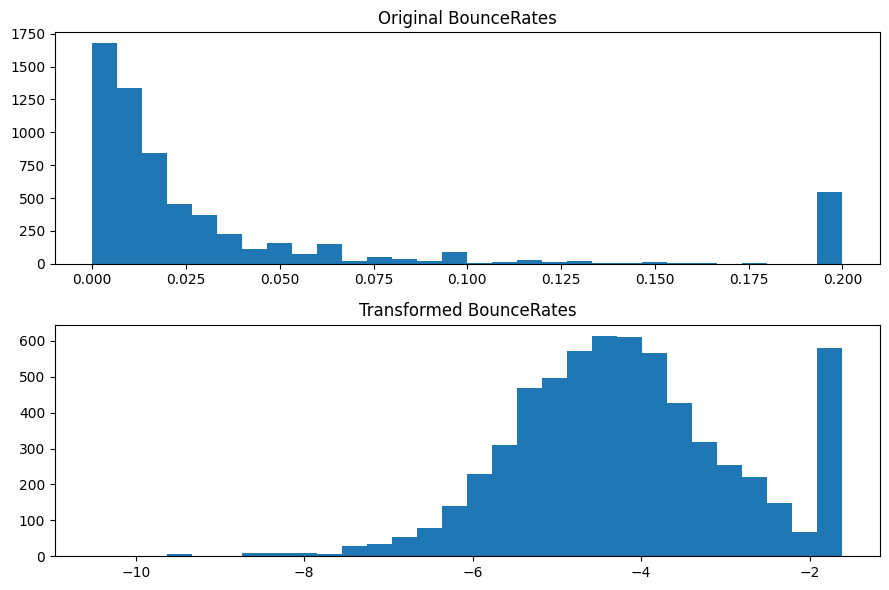

In [141]:
plot_original_and_normalized_non_zero_data('BounceRates')

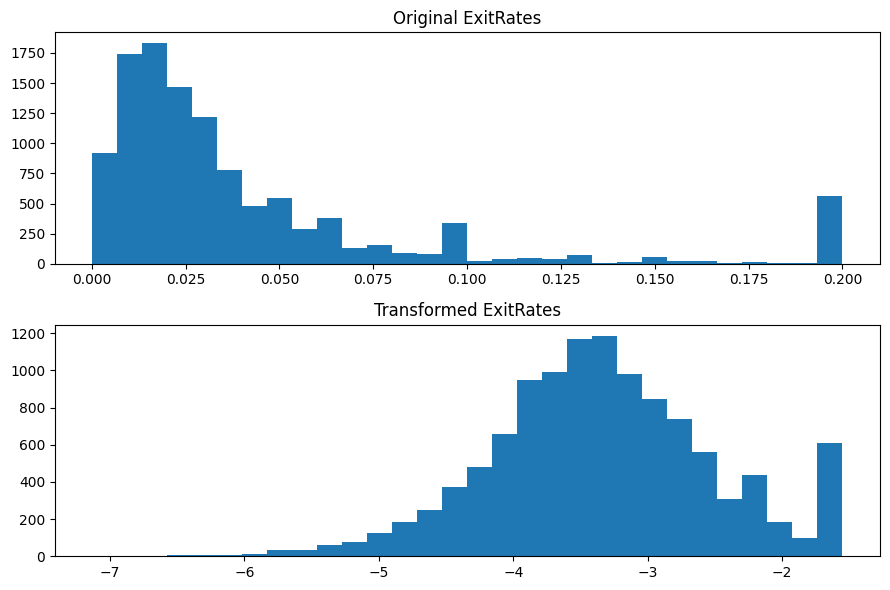

In [142]:
plot_original_and_normalized_non_zero_data('ExitRates')

Now, we need to explore what lies at the tail end of the distribution.

In [143]:
df_sessions[df_sessions.BounceRates == 0.2].shape

(549, 18)

In [144]:
df_sessions[df_sessions.ExitRates == 0.2].shape

(559, 18)

In [145]:
df_sessions[(df_sessions.Administrative_Duration == 0) & (df_sessions.Informational_Duration == 0)
& (df_sessions.PageValues == 0) & (df_sessions.ProductRelated_Duration == 0)].groupby('BounceRates').size()

BounceRates
0.000000     13
0.066667      1
0.100000      3
0.120000      1
0.166667      1
0.180000      1
0.200000    549
dtype: int64

In [146]:
df_sessions[(df_sessions.Administrative_Duration == 0) & (df_sessions.Informational_Duration == 0)
& (df_sessions.PageValues == 0) & (df_sessions.ProductRelated_Duration == 0)].groupby('ExitRates').size()

ExitRates
0.100000      5
0.133333      1
0.150000      1
0.160000      1
0.177778      1
0.181818      1
0.200000    559
dtype: int64

As observed, there exists a page with high exit and bounce rates, alongside a zero duration across all types. This could either indicate a technical error in the data or possibly one or more pages exhibiting poor functionality.

These features are highly correlated, so we could consider retaining just one of them, 'ExitRates', for example.

In [194]:
# Checking correlation in normalized data

df_sessions_wo_zero = df_sessions[['ExitRates', 'Revenue']][df_sessions['ExitRates'] > 0]. \
reset_index(drop = True).copy(deep = True)
df_sessions_wo_zero['ExitRates_bc'], _ = stats.boxcox(df_sessions_wo_zero['ExitRates'])

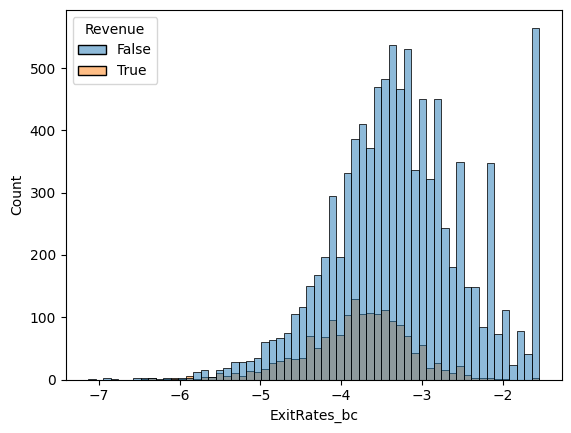

In [195]:
sns.histplot(x ='ExitRates_bc', data = df_sessions_wo_zero, hue = 'Revenue')
plt.show();

In [196]:
correlation = df_sessions_wo_zero['ExitRates_bc'].corr(df_sessions_wo_zero['Revenue'])
print(correlation)

-0.2352260550311928


It's evident that there's a difference between the groups and an inverse correlation with the target. 'ExitRates' and 'Revenue' are demonstrably related.

### PageValues

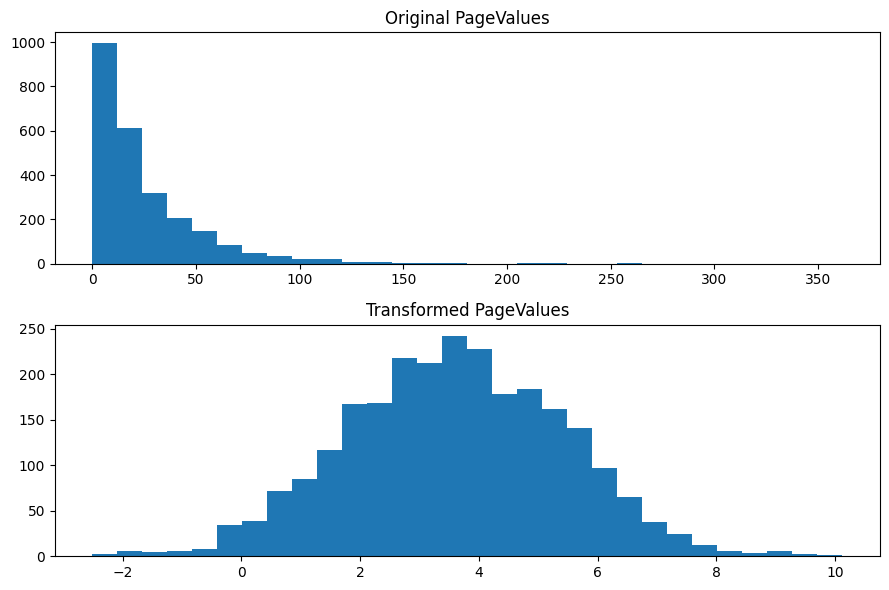

In [147]:
plot_original_and_normalized_non_zero_data('PageValues')

In [148]:
# Checking correlation in normalized data

df_sessions_wo_zero = df_sessions[['PageValues', 'Revenue']][df_sessions['PageValues'] > 0]. \
reset_index(drop = True).copy(deep = True)
df_sessions_wo_zero['PageValues_bc'], _ = stats.boxcox(df_sessions_wo_zero['PageValues'])

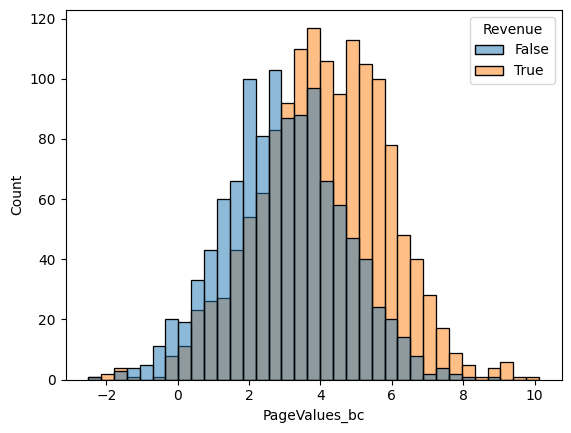

In [149]:
sns.histplot(x ='PageValues_bc', data = df_sessions_wo_zero, hue = 'Revenue')
plt.show();

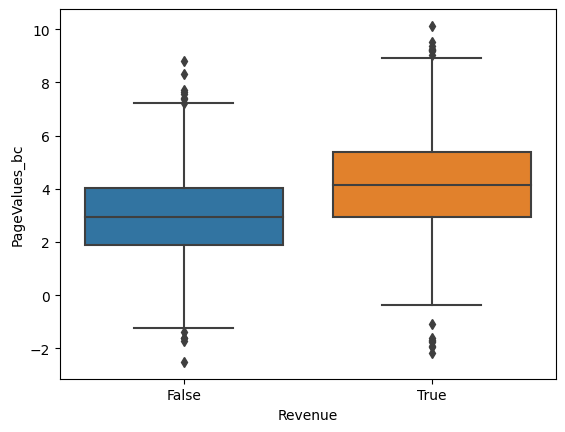

In [150]:
sns.boxplot(x='Revenue', y ='PageValues_bc', data = df_sessions_wo_zero)
plt.show();

In [151]:
correlation = df_sessions_wo_zero['PageValues_bc'].corr(df_sessions_wo_zero['Revenue'])
print(correlation)

0.3123807418365609


It's evident that there's a difference between the groups and a correlation with the target. 'PageValue' and 'Revenue' are demonstrably related.

## Profile report

In [152]:
df_copy = pd.read_csv(SESSIONS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [153]:
profile_report.to_file('Online_Shoppers_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Polars vs Pandas

### Preparing a large dataset

In [154]:
!pip install polars

import polars as pl

In [155]:
df = df_sessions.copy(deep = True)
df_big = df.copy(deep = True)

for i in range(100):
  df_big = pd.concat([df_big, df])

In [156]:
df_big.shape

(1156248, 18)

In [157]:
df_big.to_csv("data_big.csv", index=False)

### Loading dataset

In [158]:
# Polars
%%time

df_pl = pl.read_csv("data_big.csv")

CPU times: user 1.4 s, sys: 540 ms, total: 1.94 s
Wall time: 1.82 s


In [159]:
# Pandas
%%time

df_pd = pd.read_csv("data_big.csv")

CPU times: user 3 s, sys: 317 ms, total: 3.32 s
Wall time: 4.79 s


Pandas slower than Polars

### Filtering dataset

In [160]:
# Polars
%%time

df_pl[['ExitRates', 'Revenue']]

CPU times: user 99 µs, sys: 24 µs, total: 123 µs
Wall time: 128 µs


ExitRates,Revenue
f64,bool
0.2,false
0.1,false
0.2,false
0.14,false
0.05,false
0.024561,false
0.2,false
0.2,false
0.022222,false


In [161]:
# Pandas
%%time

df_pd[['ExitRates', 'Revenue']]

CPU times: user 8.2 ms, sys: 0 ns, total: 8.2 ms
Wall time: 17.3 ms


,ExitRates,Revenue
0,0.200000,False
1,0.100000,False
2,0.200000,False
3,0.140000,False
4,0.050000,False
...,...,...
1156243,0.029031,False
1156244,0.021333,False
1156245,0.086667,False
1156246,0.021053,False


Pandas slower than Polars

In [162]:
# Polars
%%time

df_pl.filter(pl.col('ExitRates') > 0.01)

CPU times: user 141 ms, sys: 210 ms, total: 352 ms
Wall time: 597 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,1,1,1,"""Returning_Visi…",false,false
0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,"""Feb""",2,2,1,2,"""Returning_Visi…",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",4,1,9,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,"""Feb""",3,2,2,4,"""Returning_Visi…",false,false
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,"""Feb""",3,3,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,"""Feb""",2,2,1,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,"""Feb""",2,4,3,3,"""Returning_Visi…",false,false
1,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,2,1,5,"""Returning_Visi…",true,false
0,0.0,0,0.0,3,738.0,0.0,0.022222,0.0,0.4,"""Feb""",2,4,1,2,"""Returning_Visi…",false,false


In [163]:
# Pandas
%%time

df_pd[df_pd.ExitRates > 0.01]

CPU times: user 89.8 ms, sys: 0 ns, total: 89.8 ms
Wall time: 217 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156243,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
1156244,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
1156245,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
1156246,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [164]:
# Pandas query
%%time

df_pd.query('ExitRates > 0.01')

CPU times: user 95.6 ms, sys: 38.1 ms, total: 134 ms
Wall time: 542 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156243,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
1156244,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
1156245,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
1156246,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Polars slower than Pandas in filtering one field

In [165]:
# Polars
%%time

df_pl.filter((pl.col('ExitRates') > 0.01) & (pl.col('Month') == 'May'))

CPU times: user 59.2 ms, sys: 19.9 ms, total: 79.1 ms
Wall time: 229 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
2,254.0,1,39.0,95,4990.959524,0.004124,0.015308,5.638103,0.0,"""May""",2,2,1,6,"""Returning_Visi…",false,true
0,0.0,0,0.0,4,158.0,0.05,0.1,0.0,0.0,"""May""",2,2,4,13,"""Returning_Visi…",false,false
0,0.0,0,0.0,77,3332.208333,0.002041,0.02472,0.0,0.6,"""May""",2,2,3,6,"""Returning_Visi…",false,false
0,0.0,0,0.0,130,4164.936905,0.006154,0.012319,0.0,0.0,"""May""",3,2,6,13,"""Returning_Visi…",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""May""",1,1,1,3,"""Returning_Visi…",false,false
3,154.5,0,0.0,21,638.333333,0.0,0.047222,0.0,0.0,"""May""",2,5,4,4,"""Returning_Visi…",false,false
0,0.0,0,0.0,13,152.25,0.030769,0.025641,0.0,0.0,"""May""",1,2,5,2,"""Returning_Visi…",false,false
0,0.0,0,0.0,17,631.5,0.011765,0.064706,0.0,0.8,"""May""",2,2,1,13,"""Returning_Visi…",false,false
7,598.0,3,144.5,83,6860.632738,0.011512,0.039306,0.0,0.4,"""May""",2,2,1,2,"""Returning_Visi…",false,false


In [166]:
# Pandas
%%time

df_pd[(df_pd.ExitRates > 0.01) & (df.Month == 'May')]

CPU times: user 356 ms, sys: 3.05 ms, total: 359 ms
Wall time: 1.26 s


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1910,2,254.000000,1,39.0,95,4990.959524,0.004124,0.015308,5.638103,0.0,May,2,2,1,6,Returning_Visitor,False,True
1911,0,0.000000,0,0.0,4,158.000000,0.050000,0.100000,0.000000,0.0,May,2,2,4,13,Returning_Visitor,False,False
1912,0,0.000000,0,0.0,77,3332.208333,0.002041,0.024720,0.000000,0.6,May,2,2,3,6,Returning_Visitor,False,False
1913,0,0.000000,0,0.0,130,4164.936905,0.006154,0.012319,0.000000,0.0,May,3,2,6,13,Returning_Visitor,False,False
1914,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,May,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5030,2,42.000000,0,0.0,17,275.702381,0.040000,0.060000,0.000000,0.6,May,3,2,8,2,Returning_Visitor,False,False
5031,4,85.928571,0,0.0,39,681.761905,0.015385,0.032988,0.000000,0.0,May,1,1,7,3,Returning_Visitor,False,False
5032,0,0.000000,0,0.0,5,95.500000,0.000000,0.013333,0.000000,0.0,May,2,4,1,3,Returning_Visitor,False,False
5033,2,76.000000,1,79.0,35,2072.666667,0.007207,0.031081,8.100000,0.8,May,2,4,7,2,Returning_Visitor,False,False


In [167]:
# Pandas query
%%time

df_pd.query("ExitRates > 0.01 and Month == 'May' ")

CPU times: user 87.4 ms, sys: 1.61 ms, total: 89 ms
Wall time: 192 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1910,2,254.000000,1,39.0,95,4990.959524,0.004124,0.015308,5.638103,0.0,May,2,2,1,6,Returning_Visitor,False,True
1911,0,0.000000,0,0.0,4,158.000000,0.050000,0.100000,0.000000,0.0,May,2,2,4,13,Returning_Visitor,False,False
1912,0,0.000000,0,0.0,77,3332.208333,0.002041,0.024720,0.000000,0.6,May,2,2,3,6,Returning_Visitor,False,False
1913,0,0.000000,0,0.0,130,4164.936905,0.006154,0.012319,0.000000,0.0,May,3,2,6,13,Returning_Visitor,False,False
1914,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,May,1,1,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149830,2,42.000000,0,0.0,17,275.702381,0.040000,0.060000,0.000000,0.6,May,3,2,8,2,Returning_Visitor,False,False
1149831,4,85.928571,0,0.0,39,681.761905,0.015385,0.032988,0.000000,0.0,May,1,1,7,3,Returning_Visitor,False,False
1149832,0,0.000000,0,0.0,5,95.500000,0.000000,0.013333,0.000000,0.0,May,2,4,1,3,Returning_Visitor,False,False
1149833,2,76.000000,1,79.0,35,2072.666667,0.007207,0.031081,8.100000,0.8,May,2,4,7,2,Returning_Visitor,False,False


It appears that Polars operates similarly to Pandas - query, yet the conventional Pandas filtration process tends to be slower.

### Aggregatinf dataset

In [176]:
# Pandas
%%time

df_pd.groupby('Region').agg({'ExitRates' : 'mean', 'ProductRelated_Duration' : 'max'})

CPU times: user 34.5 ms, sys: 9 µs, total: 34.5 ms
Wall time: 39.6 ms


,ExitRates,ProductRelated_Duration
Region,,
1,0.040894,63973.522230
2,0.042184,15454.438570
3,0.042727,24844.156200
4,0.042908,23888.810000
5,0.041237,11308.097950
6,0.042522,10415.325660
7,0.039227,17086.234240
8,0.039225,8024.509197
9,0.041788,14213.636520


In [175]:
# Polars

%%time

df_pl.groupby('Region').agg([pl.mean('ExitRates'), pl.max('ProductRelated_Duration')])

CPU times: user 51.5 ms, sys: 0 ns, total: 51.5 ms
Wall time: 35 ms


Region,ExitRates,ProductRelated_Duration
i64,f64,f64
3,0.042727,24844.1562
6,0.042522,10415.32566
9,0.041788,14213.63652
2,0.042184,15454.43857
5,0.041237,11308.09795
8,0.039225,8024.509197
1,0.040894,63973.52223
4,0.042908,23888.81
7,0.039227,17086.23424


In [178]:
# lazy operations
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='Region')
    .agg(
        [
            pl.col('ExitRates').mean(),
            pl.col('ProductRelated_Duration').max()
        ]
    )
)

q.collect()

CPU times: user 52.8 ms, sys: 0 ns, total: 52.8 ms
Wall time: 37.3 ms


Region,ExitRates,ProductRelated_Duration
i64,f64,f64
3,0.042727,24844.1562
6,0.042522,10415.32566
9,0.041788,14213.63652
2,0.042184,15454.43857
5,0.041237,11308.09795
8,0.039225,8024.509197
1,0.040894,63973.52223
4,0.042908,23888.81
7,0.039227,17086.23424


In this case, almost the same results.

## Conclusion

For further exploration of the data and assessment of relationships with `'Revenue'`, I suggest retaining the following fields:

- `'TrafficType'`
- `'Month'` (although it may not provide a full year's seasonality)
- `'VisitorType'`
- `'SpecialDay'` (as a binary feature)
- `'Administrative_Duration'` (as a binary feature)
- `'Informational_Duration'` (as a binary feature)
- `'ProductRelated_Duration'`
- `'ExitRates'`
- `'PageValues'`

Additionally, we should perform a thorough check of `'ExitRates'` for potential technical errors and examine the 'other' category within `'VisitorType'` more closely.